In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [25]:
set_plot_sizes(12,14,16)

In [26]:
df_raw = pd.read_feather('../data/tmp/bulldozers-raw')

In [27]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [28]:
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [29]:
def rmse(x, y): return math.sqrt( ((x-y)**2).mean() )

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
          m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [30]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m) 

KeyboardInterrupt: 

IndexError: list index out of range

In [31]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000) 

In [32]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m) 

CPU times: user 29.8 s, sys: 284 ms, total: 30.1 s
Wall time: 9.1 s
[0.09462229057416129, 0.3359700215878804, 0.9805726608904571, 0.7984192630763335]


In [33]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 108 ms, sys: 9.86 ms, total: 118 ms
Wall time: 165 ms
[0.5263619202009646, 0.5806170949849414, 0.3988327241043199, 0.39795686158265303]


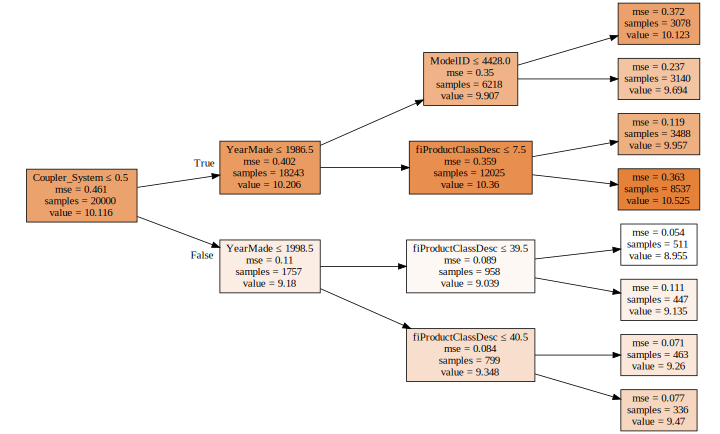

In [35]:
draw_tree(m.estimators_[0], df_trn, precision=3) 

In [37]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 382 ms, sys: 21.2 ms, total: 403 ms
Wall time: 491 ms
[5.329070518200751e-17, 0.4575402677278179, 1.0, 0.6261420519978336]
